In [ ]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls gdrive/MyDrive/DeepLearningP1/DataSet/

'Class (1)'   'Class (12)'  'Class (15)'  'Class (4)'  'Class (7)'
'Class (10)'  'Class (13)'  'Class (2)'   'Class (5)'  'Class (8)'
'Class (11)'  'Class (14)'  'Class (3)'   'Class (6)'  'Class (9)'


In [ ]:
input = '/content/gdrive/MyDrive/DeepLearningP1'

In [ ]:
print(input)

/content/gdrive/MyDrive/DeepLearningP1


In [ ]:
import splitfolders

In [ ]:
!mkdir 'Processed'

mkdir: cannot create directory ‘Processed’: File exists


In [ ]:
splitfolders.ratio(input, output = '/content/Processed', seed=42, ratio=(.7, .2, .1), group_prefix = None)

Copying files: 0 files [00:00, ? files/s]


In [ ]:
import pandas as pd
import os
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
# x = '/content/Processed_dataset'
# # path = Path(x)

In [ ]:
input = '/content/gdrive/MyDrive/DeepLearningP1'

In [ ]:
path = Path(input)
path.ls

<bound method <lambda> of PosixPath('/content/gdrive/MyDrive/DeepLearningP1')>

In [ ]:
from fastai.vision.transform import get_transforms
data = ImageDataBunch.from_folder(path, train = '.', valid_pct = 0.2, ds_tfms = get_transforms(), size = 224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


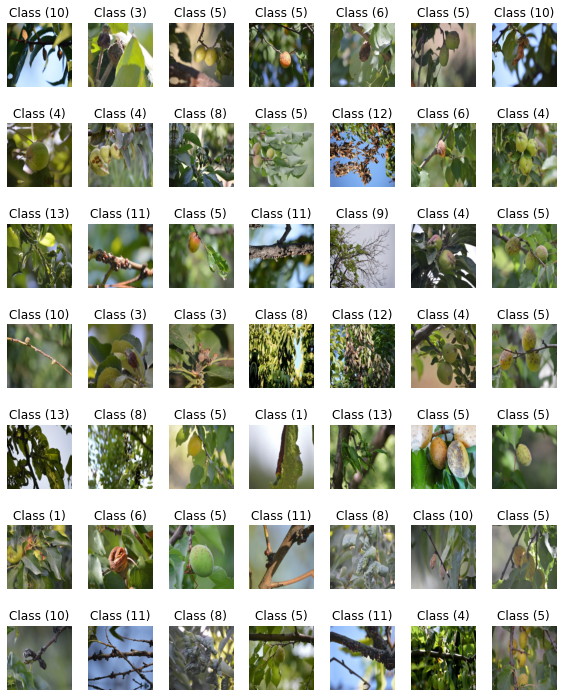

In [ ]:
data.show_batch(rows=7, figsize=(8,10))

In [ ]:
learn = cnn_learner(data, models.vgg16_bn,metrics=[accuracy,error_rate,Precision(),Recall(),FBeta()],model_dir = Path("/content/drive/My Drive/model"),path = Path("."))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


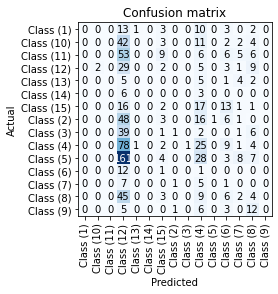

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

None


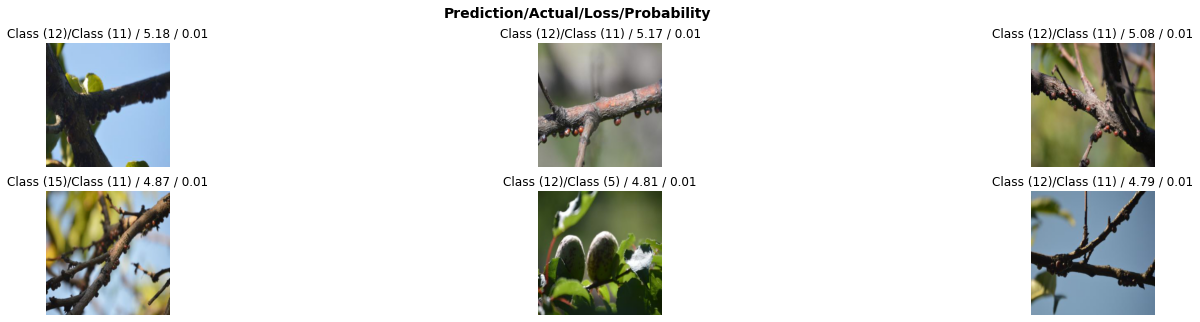

In [ ]:
campared_data = interp.plot_top_losses(6, figsize = (25,5))
print(campared_data)